To do:

- stáhnout znovu wikidata
- stáhnout wiki stránky mrtvých jezdců
- odfiltrovat mrtvé s dobře definovanými příčinami
- přes LLM nebo ručně vyzobnout u ostatních příčinu úmrtí

In [118]:
import os
import pandas as pd

In [119]:
results = pd.read_json(os.path.join('data','ergast-results.json'))
wikidata_ids = pd.read_csv(os.path.join('data','wikidata_ids.csv'))
wikid = pd.read_json(os.path.join('data','wikidata.json'))

In [120]:
results = results.merge(wikidata_ids, left_on="driverUrl", right_on="driverUrl", how="outer")

In [121]:
wikid

,wikidata_id,full_name,bio,gender,date_of_birth,place_of_birth,date_of_death,place_of_death,cause_of_death,manner_of_death
0,Q10349696,Pietro Fittipaldi,American-Brazilian racing driver (born 1996),male,1996-06-25T00:00:00.000,Miami,None,None,None,None
1,Q10490,Ayrton Senna,Brazilian racing driver (1960-1994),male,1960-03-21T00:00:00.000,maternity hospital of São Paulo,1994-05-01T00:00:00.000,Ospedale Maggiore di Bologna,traumatic brain injury,accidental death
2,Q10494,Alain Prost,French racing driver,male,1955-02-24T00:00:00.000,Lorette,None,None,None,None
3,Q10501,Nigel Mansell,British racing driver (born 1953),male,1953-08-08T00:00:00.000,Upton-upon-Severn,None,None,None,None
4,Q10505,Damon Hill,British racing driver,male,1960-09-17T00:00:00.000,Hampstead,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
871,Q9673,Lewis Hamilton,British racing driver,male,1985-01-07T00:00:00.000,Stevenage,None,None,None,None
872,Q975207,Marcus Ericsson,Swedish racing driver,male,1990-09-02T00:00:00.000,Kumla,None,None,None,None
873,Q977386,Roberto Merhi,Spanish racing driver,male,1991-03-22T00:00:00.000,Benicàssim,None,None,None,None
874,Q979668,Daniil Kvyat,Russian racing car driver,male,1994-04-26T00:00:00.000,Ufa,None,None,None,None


In [122]:
results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,quali_time,location,country,gp,status,constructor,constructorNationality,constructorRef,name,wikidata_id
0,1.0,18.0,1.0,1.0,22.0,1.0,1.0,1,1.0,10.0,...,\N,Melbourne,Australia,Australian Grand Prix,Finished,McLaren,British,mclaren,Lewis Hamilton,Q9673
1,27.0,19.0,1.0,1.0,22.0,9.0,5.0,5,5.0,4.0,...,\N,Kuala Lumpur,Malaysia,Malaysian Grand Prix,Finished,McLaren,British,mclaren,Lewis Hamilton,Q9673
2,69.0,21.0,1.0,1.0,22.0,5.0,3.0,3,3.0,6.0,...,\N,Montmeló,Spain,Spanish Grand Prix,Finished,McLaren,British,mclaren,Lewis Hamilton,Q9673
3,90.0,22.0,1.0,1.0,22.0,3.0,2.0,2,2.0,8.0,...,\N,Istanbul,Turkey,Turkish Grand Prix,Finished,McLaren,British,mclaren,Lewis Hamilton,Q9673
4,109.0,23.0,1.0,1.0,22.0,3.0,1.0,1,1.0,10.0,...,\N,Monte-Carlo,Monaco,Monaco Grand Prix,Finished,McLaren,British,mclaren,Lewis Hamilton,Q9673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26340,NaN,1126.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,...,20:00:00,Miami,USA,Miami Grand Prix,None,None,None,None,None,NaN
26341,NaN,1142.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,...,06:00:00,Las Vegas,United States,Las Vegas Grand Prix,None,None,None,None,None,NaN
26342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,...,None,None,None,None,+49 Laps,None,None,None,None,NaN
26343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,...,None,None,None,None,+38 Laps,None,None,None,None,NaN


In [123]:
results = results.merge(wikid, left_on="wikidata_id", right_on="wikidata_id", how="outer")

In [124]:
results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,wikidata_id,full_name,bio,gender,date_of_birth,place_of_birth,date_of_death,place_of_death,cause_of_death,manner_of_death
0,1.0,18.0,1.0,1.0,22.0,1.0,1.0,1,1.0,10.0,...,Q9673,Lewis Hamilton,British racing driver,male,1985-01-07T00:00:00.000,Stevenage,None,None,None,None
1,27.0,19.0,1.0,1.0,22.0,9.0,5.0,5,5.0,4.0,...,Q9673,Lewis Hamilton,British racing driver,male,1985-01-07T00:00:00.000,Stevenage,None,None,None,None
2,69.0,21.0,1.0,1.0,22.0,5.0,3.0,3,3.0,6.0,...,Q9673,Lewis Hamilton,British racing driver,male,1985-01-07T00:00:00.000,Stevenage,None,None,None,None
3,90.0,22.0,1.0,1.0,22.0,3.0,2.0,2,2.0,8.0,...,Q9673,Lewis Hamilton,British racing driver,male,1985-01-07T00:00:00.000,Stevenage,None,None,None,None
4,109.0,23.0,1.0,1.0,22.0,3.0,1.0,1,1.0,10.0,...,Q9673,Lewis Hamilton,British racing driver,male,1985-01-07T00:00:00.000,Stevenage,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Q47001334,Trevor Taylor,Wikimedia disambiguation page,None,None,None,None,None,None,None
26358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Q54371669,George Constantine,Wikimedia disambiguation page,None,None,None,None,None,None,None
26359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Q92784043,David Piper,Wikimedia disambiguation page,None,None,None,None,None,None,None
26360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Q93023360,Arthur Owen,Wikimedia disambiguation page,None,None,None,None,None,None,None


In [125]:
results['date_of_death'] = pd.to_datetime(results['date_of_death'])

In [126]:
results['date'] = pd.to_datetime(results['date'])

In [127]:
living = results[results['date_of_death'].isnull()]['full_name'].drop_duplicates().to_list()
len(living)

364

In [128]:
dead = results[~results['date_of_death'].isnull()]['full_name'].drop_duplicates().to_list()
len(dead)

509

In [129]:
results[results['full_name'].isin(dead)][['full_name','date_of_birth','date_of_death','cause_of_death','manner_of_death']].drop_duplicates().sort_values(by='date_of_birth',ascending=False).head(50)

,full_name,date_of_birth,date_of_death,cause_of_death,manner_of_death
18900,Jules Bianchi,1989-08-03T00:00:00.000,2015-07-17,diffuse axonal injury,accidental death
19436,Justin Wilson,1978-07-31T00:00:00.000,2015-08-24,None,None
26192,Roland Ratzenberger,1960-07-04T00:00:00.000,1994-04-30,basilar skull fracture,accidental death
21252,Adrián Campos,1960-06-17T00:00:00.000,2021-01-27,None,None
3426,Ayrton Senna,1960-03-21T00:00:00.000,1994-05-01,traumatic brain injury,accidental death
4559,Andrea de Cesaris,1959-05-31T00:00:00.000,2014-10-05,motorcycle accident,accidental death
26098,Riccardo Paletti,1958-06-15T00:00:00.000,1982-06-13,None,None
23124,"John Crichton-Stuart, 7th Marquess of Bute",1958-04-26T00:00:00.000,2021-03-22,None,None
22467,Elio de Angelis,1958-03-26T00:00:00.000,1986-05-15,smoke inhalation injury,None
21930,Stefan Bellof,1957-11-20T00:00:00.000,1985-09-01,None,None


In [148]:
results['cause_of_death'].drop_duplicates().to_list()

[None,
 'traumatic brain injury',
 'motorcycle accident',
 "Parkinson's disease",
 'myocardial infarction',
 'traffic collision',
 'brain cancer',
 'disease',
 'cerebral hemorrhage',
 'aviation accident',
 'liver cancer',
 'Fortune de mer',
 'cancer',
 'respiratory failure',
 'burn',
 'pneumonia',
 'car collision',
 'peritonitis',
 'tuberculosis',
 'diabetes',
 'diffuse axonal injury',
 'embolism',
 'lymphoma',
 'smoke inhalation injury',
 'testicular cancer',
 'cerebrovascular disease',
 'liver failure',
 'pulmonary fibrosis',
 'cardiac arrest',
 'decapitation',
 'death from AIDS-related complications',
 'pulmonary embolism',
 'asphyxia',
 'dementia',
 'aircraft crash',
 'lung cancer',
 'stroke',
 'stomach cancer',
 'leukemia',
 'cardioplegia',
 'pancreatic cancer',
 'Merkel cell carcinoma',
 'hyperthermia',
 'AIDS related disease',
 'basilar skull fracture',
 "Alzheimer's disease",
 nan]

In [130]:
results[results['full_name'].isin(dead)][['full_name','date_of_birth','date_of_death','cause_of_death','manner_of_death']].drop_duplicates().sort_values(by='date_of_death',ascending=False).head(50)

,full_name,date_of_birth,date_of_death,cause_of_death,manner_of_death
23419,Wilson Fittipaldi Júnior,1943-12-25T00:00:00.000,2024-02-23,cardiac arrest,natural causes
24376,Alberto Colombo,1946-02-23T00:00:00.000,2024-01-07,None,None
24868,Basil van Rooyen,1939-04-19T00:00:00.000,2023-09-14,None,None
26116,Kenneth McAlpine,1920-09-21T00:00:00.000,2023-04-08,None,None
22269,Slim Borgudd,1946-11-25T00:00:00.000,2023-02-23,None,None
13137,Jean-Pierre Jabouille,1942-10-01T00:00:00.000,2023-02-02,None,None
13192,Philippe Streiff,1955-06-26T00:00:00.000,2022-12-23,None,None
4773,Patrick Tambay,1949-06-25T00:00:00.000,2022-12-04,Parkinson's disease,natural causes
15151,Tony Brooks,1932-02-25T00:00:00.000,2022-05-03,None,None
22729,Reine Wisell,1941-09-30T00:00:00.000,2022-03-20,None,None


In [131]:
results.groupby('date_of_death')['name'].nunique().nlargest(10)

date_of_death
1951-07-29    3
1960-06-19    3
1957-07-14    2
1959-08-01    2
1966-06-11    2
1975-11-29    2
1987-02-10    2
2014-05-04    2
1950-07-29    1
1950-09-10    1
Name: name, dtype: int64

In [132]:
results['life_remaining'] = results['date_of_death'] - results['date']

In [133]:
results.groupby('year')['life_remaining'].mean().nsmallest()

year
2014.0              389 days 12:48:00
2013.0    719 days 08:50:31.578947368
1994.0             3658 days 08:00:00
1993.0   3675 days 18:15:39.130434752
1992.0             4000 days 22:00:00
Name: life_remaining, dtype: timedelta64[ns]

<Axes: xlabel='year'>

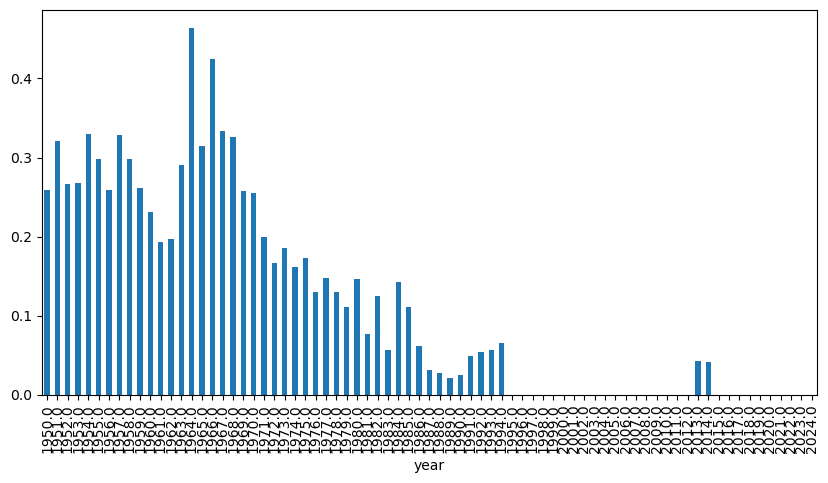

In [150]:
pd.Series(results[(results['life_remaining'] < pd.Timedelta((365.25*10), unit='d'))].groupby('year')['name'].nunique() / results.groupby('year')['name'].nunique()).plot.bar(figsize=(10,5))

<Axes: xlabel='year'>

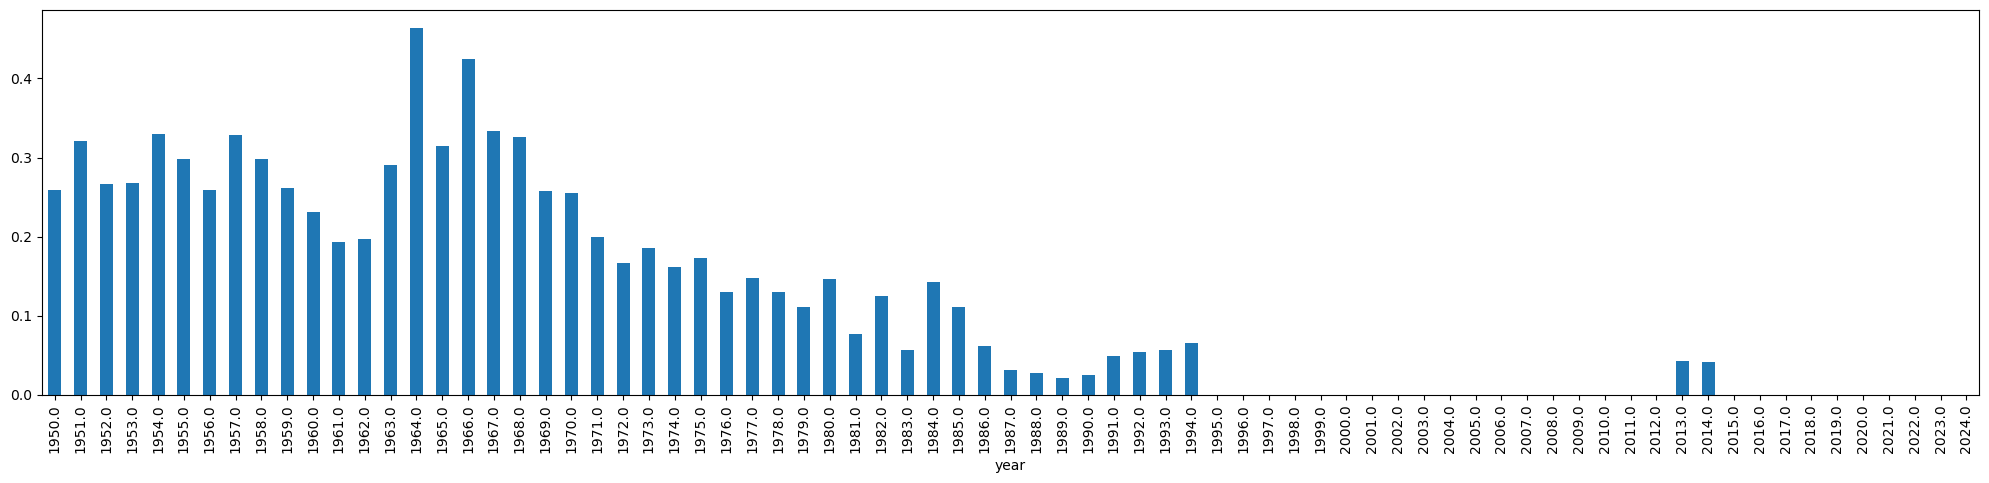

In [134]:
pd.Series(results[(results['life_remaining'] < pd.Timedelta((365.25*10), unit='d'))].groupby('year')['name'].nunique() / results.groupby('year')['name'].nunique()).plot.bar(figsize=(25,5))

In [135]:
pd.Series(results[(results['life_remaining'] < pd.Timedelta((365.25*10), unit='d'))].groupby('year')['name'].nunique() / results.groupby('year')['name'].nunique()).max()

0.4634146341463415

<Axes: xlabel='year'>

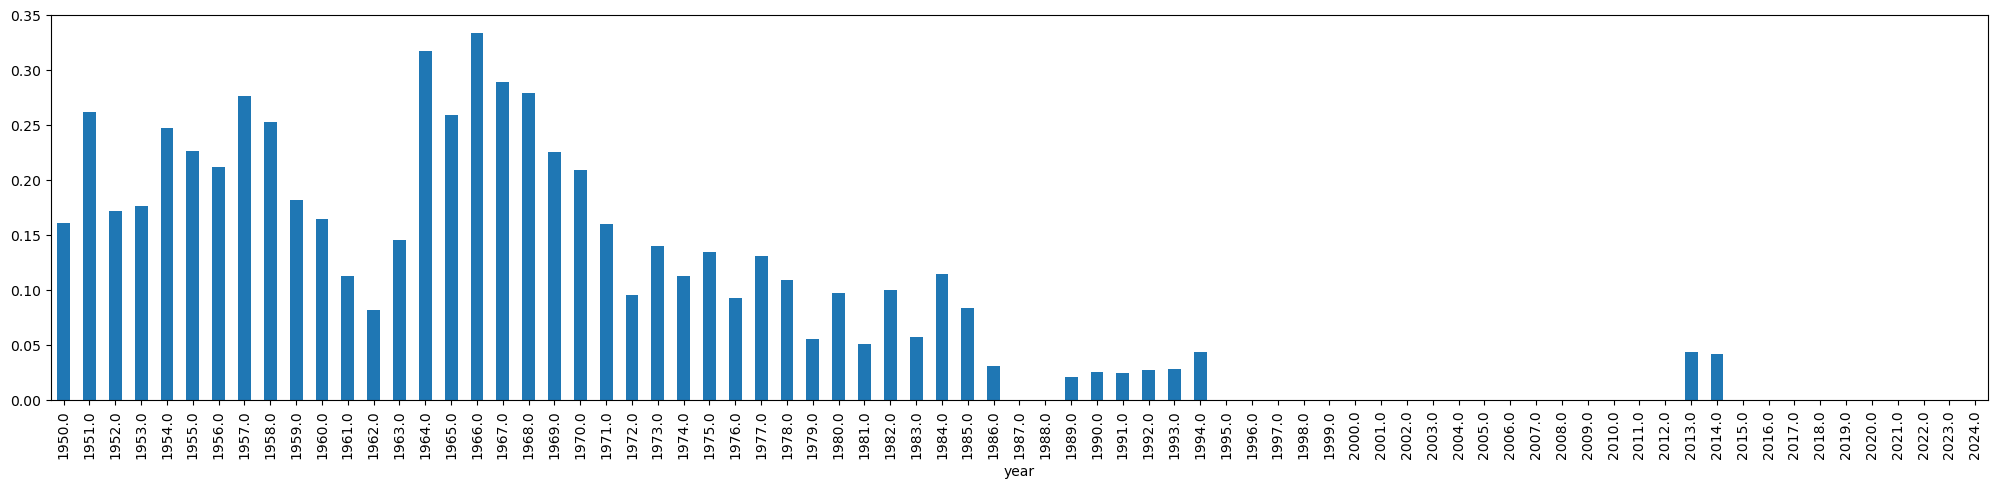

In [136]:
pd.Series(results[(results['life_remaining'] < pd.Timedelta((365.25*5), unit='d'))].groupby('year')['name'].nunique() / results.groupby('year')['name'].nunique()).plot.bar(figsize=(25,5))

<Axes: xlabel='year'>

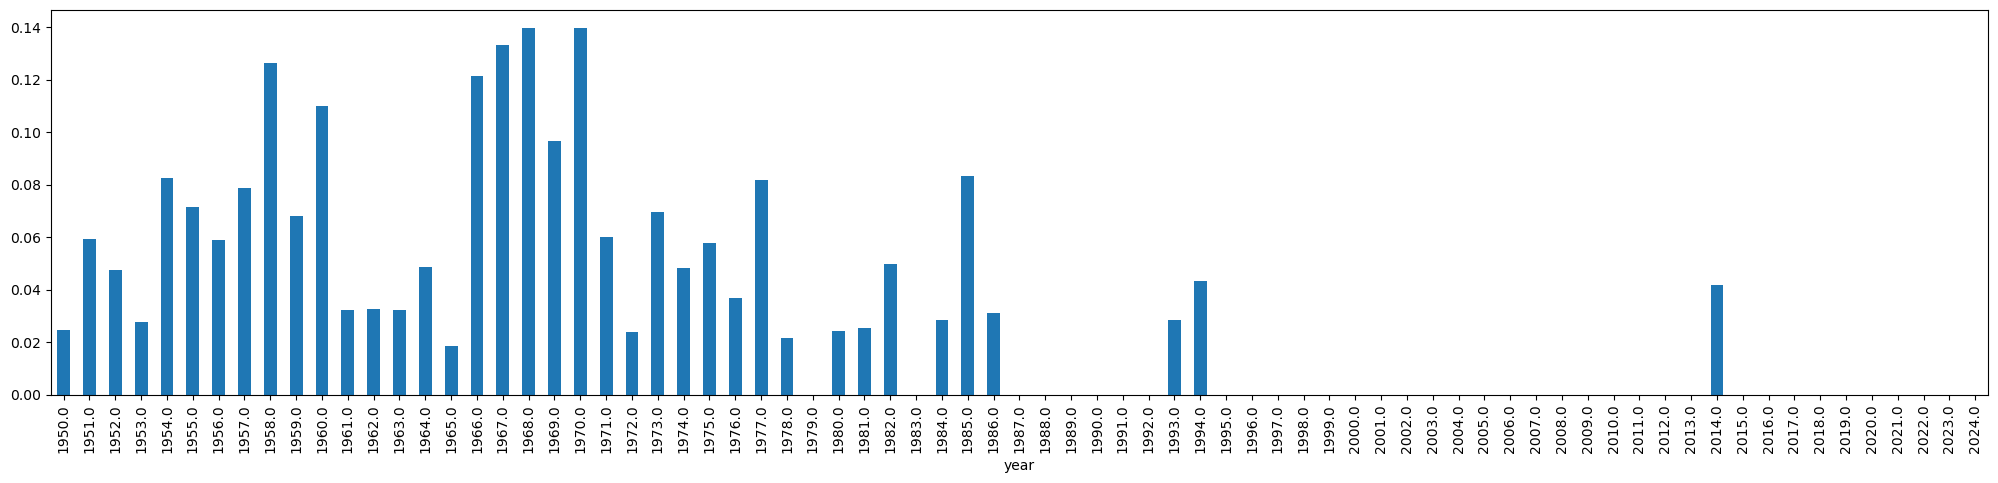

In [137]:
pd.Series(results[(results['life_remaining'] < pd.Timedelta((365.25), unit='d'))].groupby('year')['name'].nunique() / results.groupby('year')['name'].nunique()).plot.bar(figsize=(25,5))

In [138]:
results['manner_of_death'].drop_duplicates()

0                           None
3426            accidental death
4231              natural causes
15022                    suicide
22918    Graham Hill plane crash
23631                   homicide
24833    1967 British Grand Prix
25086           Formula One race
26320                        NaN
Name: manner_of_death, dtype: object

In [139]:
sad = ['accidental death','Graham Hill plane crash','1967 British Grand Prix','Formula One race']

In [140]:
results[results['manner_of_death'] == 'homicide'][['name','date_of_death']].drop_duplicates()

,name,date_of_death
23631,Jackie Pretorius,2009-03-30
24292,Ricardo Londoño,2009-07-18


In [141]:
results[results['manner_of_death'] == 'suicide'][['name','date_of_death']].drop_duplicates()

,name,date_of_death
15022,Willy Mairesse,1969-09-02
25165,Hap Sharp,1993-05-07


In [142]:
def total_age(dod, dob):
    try:
        print(dod)
        print(dob)
        return dod - dob
    except:
        return None

In [143]:
results.groupby(['date_of_death'])['name'].nunique().nlargest()

date_of_death
1951-07-29    3
1960-06-19    3
1957-07-14    2
1959-08-01    2
1966-06-11    2
Name: name, dtype: int64

In [144]:
results['lived_until'] = results.apply(lambda row: total_age(row['date_of_death'], row['date_of_birth']), axis = 1)

NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00

NaT
1953-07-27T00:00:00.000
NaT
1953-07-27T00:00:00.000
NaT
1953-07-27T00:00:00.000
NaT
1953-07-27T00:00:00.000
NaT
1953-07-27T00:00:00.000
NaT
1952-02-19T00:00:00.000
NaT
1943-01-24T00:00:00.000
NaT
1943-01-24T00:00:00.000
NaT
1943-01-24T00:00:00.000
NaT
1943-01-24T00:00:00.000
NaT
1943-01-24T00:00:00.000
NaT
1943-01-24T00:00:00.000
NaT
1977-05-10T00:00:00.000
NaT
1977-05-10T00:00:00.000
NaT
1977-05-10T00:00:00.000
NaT
1977-05-10T00:00:00.000
NaT
1977-05-10T00:00:00.000
NaT
1977-05-10T00:00:00.000
NaT
1977-05-10T00:00:00.000
NaT
1977-05-10T00:00:00.000
NaT
1977-05-10T00:00:00.000
NaT
1977-05-10T00:00:00.000
NaT
1977-05-10T00:00:00.000
NaT
1977-05-10T00:00:00.000
NaT
1977-05-10T00:00:00.000
NaT
1977-05-10T00:00:00.000
NaT
1977-05-10T00:00:00.000
NaT
1977-05-10T00:00:00.000
NaT
1977-05-10T00:00:00.000
NaT
1977-05-10T00:00:00.000
NaT
1977-05-10T00:00:00.000
NaT
1977-05-10T00:00:00.000
NaT
1977-05-10T00:00:00.000
NaT
1977-05-10T00:00:00.000
NaT
1977-05-10T00:00:00.000
NaT
1977-05-10T00:00

2001-04-25 00:00:00
1956-12-23T00:00:00.000
2001-04-25 00:00:00
1956-12-23T00:00:00.000
2001-04-25 00:00:00
1956-12-23T00:00:00.000
2001-04-25 00:00:00
1956-12-23T00:00:00.000
2001-04-25 00:00:00
1956-12-23T00:00:00.000
2001-04-25 00:00:00
1956-12-23T00:00:00.000
2001-04-25 00:00:00
1956-12-23T00:00:00.000
2001-04-25 00:00:00
1956-12-23T00:00:00.000
2001-04-25 00:00:00
1956-12-23T00:00:00.000
2001-04-25 00:00:00
1956-12-23T00:00:00.000
2001-04-25 00:00:00
1956-12-23T00:00:00.000
2001-04-25 00:00:00
1956-12-23T00:00:00.000
2001-04-25 00:00:00
1956-12-23T00:00:00.000
2001-04-25 00:00:00
1956-12-23T00:00:00.000
2001-04-25 00:00:00
1956-12-23T00:00:00.000
2001-04-25 00:00:00
1956-12-23T00:00:00.000
2001-04-25 00:00:00
1956-12-23T00:00:00.000
2001-04-25 00:00:00
1956-12-23T00:00:00.000
2001-04-25 00:00:00
1956-12-23T00:00:00.000
2001-04-25 00:00:00
1956-12-23T00:00:00.000
2001-04-25 00:00:00
1956-12-23T00:00:00.000
2001-04-25 00:00:00
1956-12-23T00:00:00.000
2001-04-25 00:00:00
1956-12-23T0

2015-08-24 00:00:00
1978-07-31T00:00:00.000
2015-08-24 00:00:00
1978-07-31T00:00:00.000
2015-08-24 00:00:00
1978-07-31T00:00:00.000
2015-08-24 00:00:00
1978-07-31T00:00:00.000
2015-08-24 00:00:00
1978-07-31T00:00:00.000
2015-08-24 00:00:00
1978-07-31T00:00:00.000
2015-08-24 00:00:00
1978-07-31T00:00:00.000
2015-08-24 00:00:00
1978-07-31T00:00:00.000
NaT
1975-03-05T00:00:00.000
NaT
1975-03-05T00:00:00.000
NaT
1975-03-05T00:00:00.000
NaT
1975-03-05T00:00:00.000
NaT
1975-03-05T00:00:00.000
NaT
1975-03-05T00:00:00.000
NaT
1975-03-05T00:00:00.000
NaT
1975-03-05T00:00:00.000
NaT
1975-03-05T00:00:00.000
NaT
1975-03-05T00:00:00.000
NaT
1975-03-05T00:00:00.000
NaT
1975-03-05T00:00:00.000
NaT
1975-03-05T00:00:00.000
NaT
1975-03-05T00:00:00.000
NaT
1975-03-05T00:00:00.000
NaT
1976-07-24T00:00:00.000
NaT
1976-07-24T00:00:00.000
NaT
1976-07-24T00:00:00.000
NaT
1976-07-24T00:00:00.000
NaT
1976-07-24T00:00:00.000
NaT
1976-07-24T00:00:00.000
NaT
1976-07-24T00:00:00.000
NaT
1976-07-24T00:00:00.000
NaT


2009-02-01 00:00:00
1927-07-04T00:00:00.000
1966-11-12 00:00:00
1920-06-02T00:00:00.000
1966-11-12 00:00:00
1920-06-02T00:00:00.000
2006-03-29 00:00:00
1926-11-01T00:00:00.000
2006-03-29 00:00:00
1926-11-01T00:00:00.000
2006-03-29 00:00:00
1926-11-01T00:00:00.000
2006-03-29 00:00:00
1926-11-01T00:00:00.000
2006-03-29 00:00:00
1926-11-01T00:00:00.000
1960-09-24 00:00:00
1922-04-09T00:00:00.000
1960-09-24 00:00:00
1922-04-09T00:00:00.000
1960-09-24 00:00:00
1922-04-09T00:00:00.000
1960-09-24 00:00:00
1922-04-09T00:00:00.000
1960-09-24 00:00:00
1922-04-09T00:00:00.000
1960-09-24 00:00:00
1922-04-09T00:00:00.000
1960-09-24 00:00:00
1922-04-09T00:00:00.000
1960-09-24 00:00:00
1922-04-09T00:00:00.000
1960-09-24 00:00:00
1922-04-09T00:00:00.000
1993-03-13 00:00:00
1926-01-28T00:00:00.000
1993-03-13 00:00:00
1926-01-28T00:00:00.000
1993-03-13 00:00:00
1926-01-28T00:00:00.000
1993-03-13 00:00:00
1926-01-28T00:00:00.000
1993-03-13 00:00:00
1926-01-28T00:00:00.000
1993-03-13 00:00:00
1926-01-28T0

In [145]:
results['lived_until'].drop_duplicates()

0    None
Name: lived_until, dtype: object

<Axes: xlabel='year'>

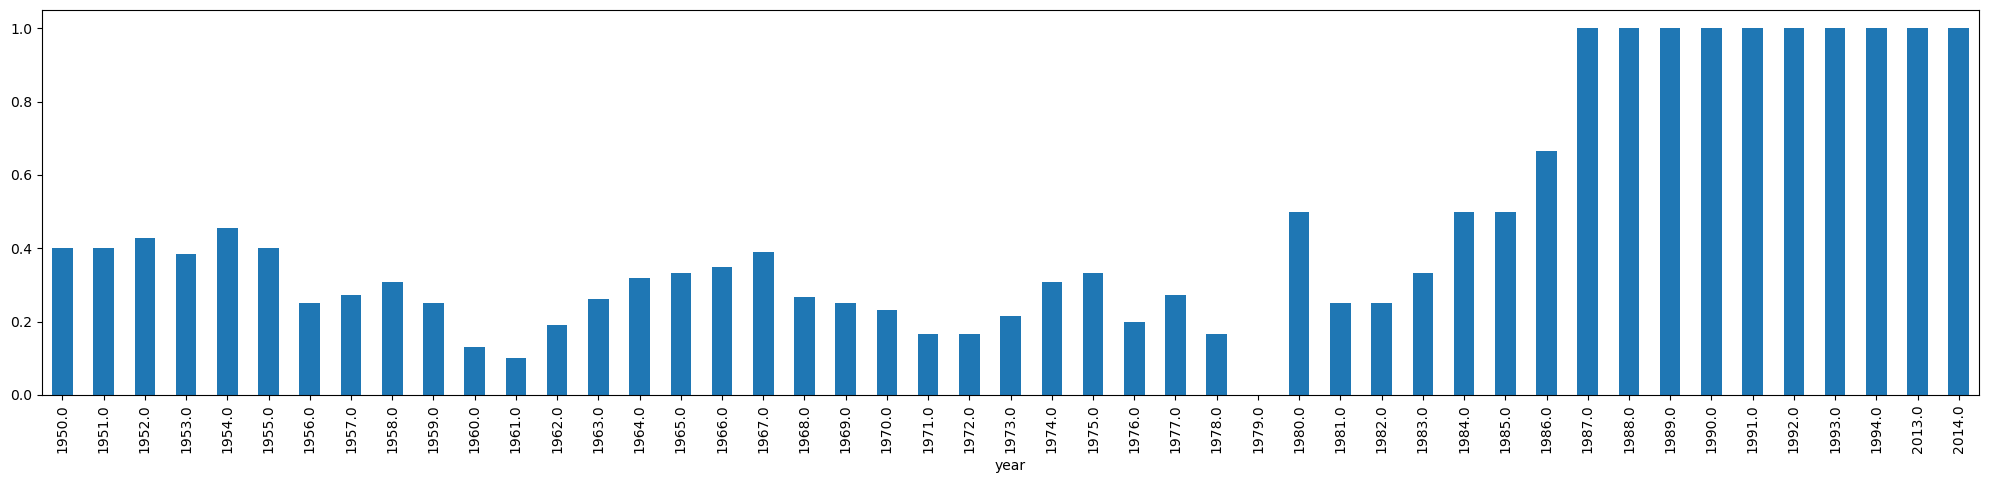

In [146]:
pd.Series(results[(results['manner_of_death'].isin(sad))].groupby('year')['name'].nunique() / results[~(results['manner_of_death'].isnull())].groupby('year')['name'].nunique()).plot.bar(figsize=(25,5))

<Axes: xlabel='year'>

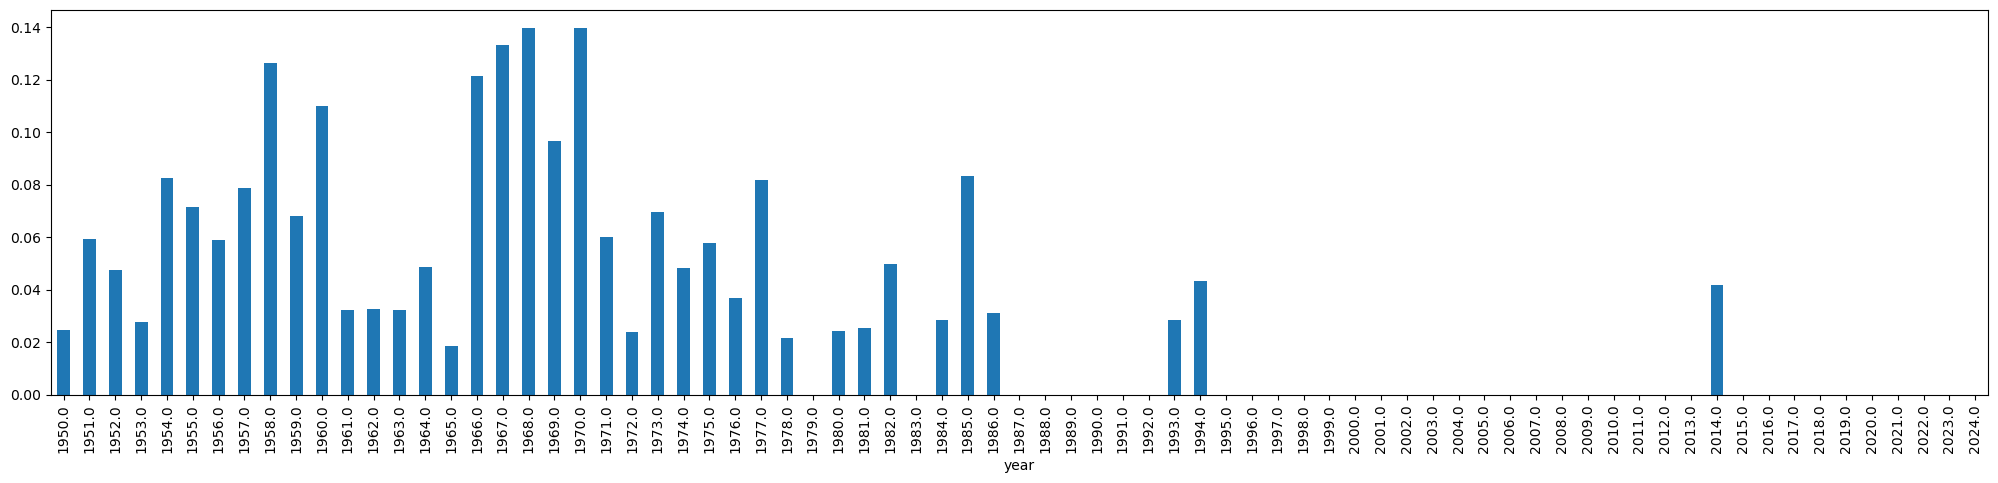

In [147]:
pd.Series(results[(results['life_remaining'] < pd.Timedelta((365.25), unit='d'))].groupby('year')['name'].nunique() / results.groupby('year')['name'].nunique()).plot.bar(figsize=(25,5))